# Homework: Gaussian Quadrature Integration

###### GH: Gauss-Hermite; GL: Gauss-Legendre; GLa: Gauss-Laguerre

For all the problems, you may obtain $\{\omega_i, \xi_i \}$ directly from Julia's `FastGaussQuadrature` packages. For instance, `xi, wi = gausslegendre(20)` would give $\{\omega_i, \xi_i \}$, $i=1,\ldots,20$, from the Gauss-Legendre rule.

## This problem asks you to adopt the Gauss-Hermite rule to an infinite integral where the weight function does not match.  The integration problem is:
  $$\begin{aligned}
   I = \int_{-\infty}^\infty g(x) d x =  \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx.
  \end{aligned}$$ 
 

- ##### Let's do this without using changes of variables. 
  - Transform $g(x)$ to $e^{-x^2}f(x)$ so that the Gauss-Hermite rule could be applied. Write down the re-formulated integration problem explicitly and write down $f(x)$ explicitly.
  - Write Julia code to integrate the function numerically.

Rewrite $I=\int_{-\infty}^{\infty}g(x)dx=\int_{-\infty}^{\infty}e^{-x^2}[e^{x^2}exp(-\frac{1}{3}x^2)\sqrt{1+X^2}]dx\\ =\int_{-\infty}^{\infty}e^{-x^2}f(x)dx$, where $f(x)=e^{x^2}exp(-\frac{1}{3}x^2)\sqrt{1+X^2}$

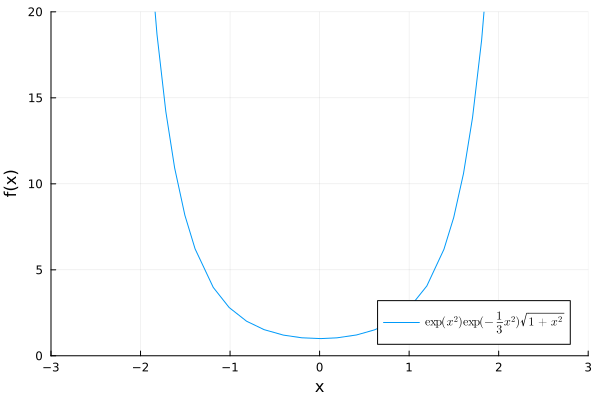

In [2]:
using FastGaussQuadrature, Plots, LaTeXStrings

legend = L"\exp(x^2)\exp(-\frac{1}{3}x^2)\sqrt{1+x^2}"

f(x)=exp(x^2)*exp((-1/3)*x^2)*sqrt(1+x^2)

plot(x->f(x), xlim=[-3,3], ylim=[0,20], label=legend, xlabel="x", ylabel="f(x)")


In [62]:
answer = zeros(30)
for n in 1:30
  xi, wi=gausshermite(n)
  answer[n] = sum(wi .* f.(xi))
end

answer

30-element Vector{Float64}:
 1.7724538509055159
 3.0296007050082014
 3.7209601959715215
 4.114431445081339
 4.324062588156398
 4.438071872756228
 4.497660914784761
 4.529479220928181
 4.545890163734584
 4.554583440178787
 4.559014977139771
 4.561359541840713
 4.562538986715969
 ⋮
 4.563789600026693
 4.563801822412576
 4.563806774853566
 4.563810210124797
 4.563811310498705
 4.563812338718447
 4.563812522274729
 4.563812863778523
 4.563812854728132
 4.563812985319125
 4.563812950922884
 4.5638130088853694

In [63]:
# verify our result
using QuadGK
g(x)=exp((-1/3)*x^2)*sqrt(1+x^2)
quadgk(g,-Inf,Inf)

(4.563813002879844, 1.534671996550493e-8)

## Write a Julia function with the following specifications.
  - It calculates $E[g(y)]$ for any arbitrary $g(y)$ where $y \sim N(\mu, \sigma^2)$.
  - User's inputs include $g(y)$, $\mu$, $\sigma^2$, and $n$.
  - You may obtain $\{\omega_i, \xi_i\}$ directly from Julia's package.
  - If $g(y) = 1 + 3y + y^2$, $y \sim N(1,2)$, and $n=30$, the interface could be like `myInteg(1 + 3y + y^2, mean=1, variance=2, n=30)`, or, `myInteg(g, mean=1, variance=2, n=30)`.
  - Hint: You may define the probability density function of $y$ using the `Distributions` package and then `pdf(Normal(mean, std.dev.),x)`.

$E[g(y)]=\int_{-\infty}^{\infty}g(y)p(y)dy$ where $p(y)$ is the pdf of $N(\mu,\sigma^2)$

i.e.,$p(y)=\frac{1}{\sqrt{2\pi\sigma^2}}exp(\frac{-(y-\mu)^2}{2\sigma^2})$

In [4]:
using FastGaussQuadrature, Distributions

function myInteg(; g::Function, mean=1, variance=2, n=30)
    std_dev = sqrt(variance)
    f(y) = exp(y^2) * pdf(Normal(mean, std_dev), y) * g(y)
    xi, wi = gausshermite(n)
    answer = sum(wi .* f.(xi))
    return answer
end


@show myInteg(g=y-> 1+3y+y^2, mean=1, variance=2, n=30)
@show myInteg(g=y-> 1, mean=1, variance=2, n=30)

# verify our result

using QuadGK
g(y)=(1+3y+y^2)* pdf(Normal(1, sqrt(2)), y)
quadgk(g,-Inf,Inf)

myInteg(g = (y->begin
                #= In[4]:12 =#
                1 + 3y + y ^ 2
            end), mean = 1, variance = 2, n = 30) = 6.999792968988665
myInteg(g = (y->begin
                #= In[4]:13 =#
                1
            end), mean = 1, variance = 2, n = 30) = 0.9999976633575027


(6.9999999999999964, 1.0348334495834837e-7)

## It is generally true that proper integrals (i.e., with finite domains) are numerically easier to deal with. But what if a problem is naturally a GH type with an infinite domain and we transform it to a GL problem with a finite domain? Is the GL rule better in this scenario? Let's find out the answer. Consider the following integration problem which is often encountered in econometric analysis. 

$$\begin{aligned}
      I = \int_{-\infty}^\infty \Phi\left(\frac{x-a}{b}\right)\phi(x) dx,
\end{aligned}$$

where $X\sim N(0,1)$ is a standard normal random variable, $\phi(z)$ is the density function (PDF) of a random variable $z$, and $\Phi(z)$ is the CDF of $z$.
   - ##### Write a Julia function that uses the GH rule to approximate the integral. The program should be a function of $a$ and $b$.
   - ##### Transform this problem to the GL type. What is the transformation rule and what is the Jacobian? Type the equations and show your work.
   - ##### Write a Julia function that uses the GL rule to approximate the integral. The program should be a function of $a$ and $b$.
   - ##### Suppose the required precision is 6 digits after the decimal. Compare the performances of these functions. Which one converges more quickly (smaller $n$)? You may pick values of $a$ and $b$ to do the comparison. You may draw graphs to compare the results.
   - ##### Based on your results, is the GL rule always the most efficient?

The transformation is $x=\frac{t}{1-t^2}$ with Jacobian=$\frac{t^2+1}{(t^2-1)^2}$

Note that if $X \sim N(0,1)$, then $\frac{X-a}{b} \sim N(-\frac{a}{b}, \frac{1}{b^2})$



$$I = \int_{-\infty}^\infty \Phi\left(\frac{x-a}{b}\right)\phi(x) dx\\
=\int_{-1}^{1} \Phi\left(\frac{t}{b(1-t^2)}-\frac{a}{b}\right)\phi(\frac{t}{1-t^2}) \frac{t^2+1}{(t^2-1)^2}dt$$

quadgk(f, -Inf, Inf) = (0.8144533152386512, 3.0952014175118833e-9)
GHinteg(a = 2, b = 2) = 0.8144533152383855
GLinteg(a = 2, b = 2) = 0.814464414160198


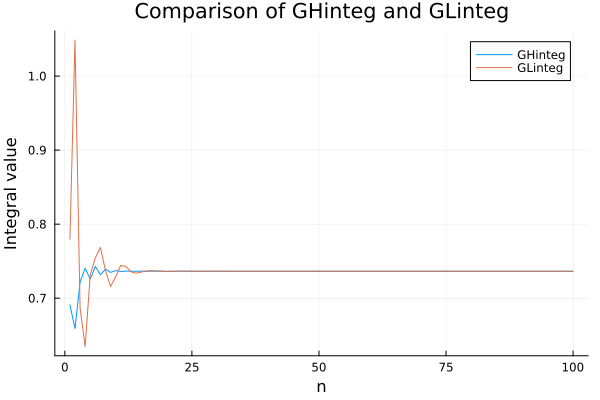

In [9]:
# cdf取 Normal(-a/b,sqrt(1/b^2))

using FastGaussQuadrature, Distributions, Plots

function GHinteg(; a, b, n=30)

    
    f(x)= exp(x^2) * pdf(Normal(0,1),x) * cdf(Normal(-a/b,sqrt(1/b^2)), x)
    xi, wi = gausshermite(n)
    answer = sum(wi .* f.(xi))
    return answer
end


function GLinteg(; a, b, n=30)
    # x=t/(1-t^2)
    f(t)= cdf(Normal(-a/b,sqrt(1/b^2)), t/(1-t^2)) * pdf(Normal(0,1), t/(1-t^2)) * (t^2+1)/((t^2-1)^2)
    xi, wi = gausslegendre(n)
    answer=sum(wi .* f.(xi))
    return answer
end


# verify our result

using QuadGK
a=2
b=2
f(x)= pdf(Normal(0,1),x) * cdf(Normal(-a/b,sqrt(1/b^2)), x)
@show quadgk(f,-Inf,Inf)
@show GHinteg(a=2,b=2)
@show GLinteg(a=2,b=2)


# Compute the integrals for a range of n values



a = 2
b = 3
n_values = 1:100
# put the result into vectors
GHinteg_values = [GHinteg(a=a, b=b, n=n) for n in n_values]
GLinteg_values = [GLinteg(a=a, b=b, n=n) for n in n_values]

        
# Plot the results
    
plot(n_values, GHinteg_values, label="GHinteg")
plot!(n_values, GLinteg_values, label="GLinteg")
xlabel!("n")
ylabel!("Integral value")
title!("Comparison of GHinteg and GLinteg")

quadgk(f, -Inf, Inf) = (0.5000000000000001, 7.243345293819564e-10)
GHinteg(a = 2, b = 2) = 0.49999999999999806
GLinteg(a = 2, b = 2) = 0.5000154106168546


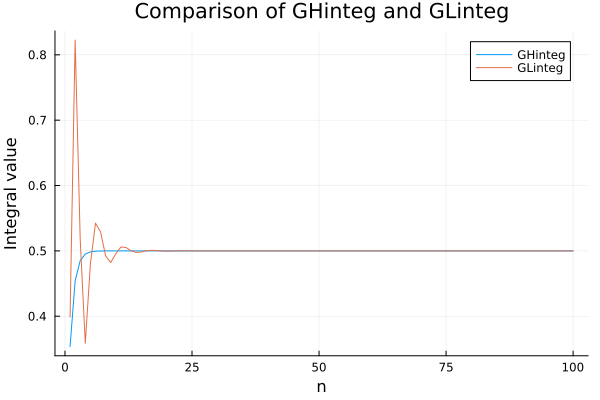

In [11]:
# cdf取 Normal(-a/b,sqrt(1/b^2))

using FastGaussQuadrature, Distributions, Plots

function GHinteg(; a, b, n=30)
    
    
    f(x)= exp(x^2) * pdf(Normal(0,1),x) * cdf(Normal(-a/b,sqrt(1/b^2)), (x-a)/b)
    xi, wi = gausshermite(n)
    answer = sum(wi .* f.(xi))
    return answer
end


function GLinteg(; a, b, n=30)

    f(t)= cdf(Normal(-a/b,sqrt(1/b^2)), t/(b*(1-t^2))-a/b) * pdf(Normal(0,1), t/(1-t^2)) * (t^2+1)/((t^2-1)^2)
    xi, wi = gausslegendre(n)
    answer=sum(wi .* f.(xi))
    return answer
end


# verify our result

using QuadGK
a=2
b=2
f(x)= pdf(Normal(0,1),x) * cdf(Normal(-a/b,sqrt(1/b^2)), (x-a)/b)
@show quadgk(f,-Inf,Inf)
@show GHinteg(a=2,b=2)
@show GLinteg(a=2,b=2)


# Compute the integrals for a range of n values



a = 2
b = 3
n_values = 1:100
# put the result into vectors
GHinteg_values = [GHinteg(a=a, b=b, n=n) for n in n_values]
GLinteg_values = [GLinteg(a=a, b=b, n=n) for n in n_values]

        
# Plot the results
    
plot(n_values, GHinteg_values, label="GHinteg")
plot!(n_values, GLinteg_values, label="GLinteg")
xlabel!("n")
ylabel!("Integral value")
title!("Comparison of GHinteg and GLinteg")

quadgk(f, -Inf, Inf) = (0.18554668476134722, 7.58844490566135e-10)
GHinteg(a = 2, b = 2) = 0.18554668476134697
GLinteg(a = 2, b = 2) = 0.18556014292672407


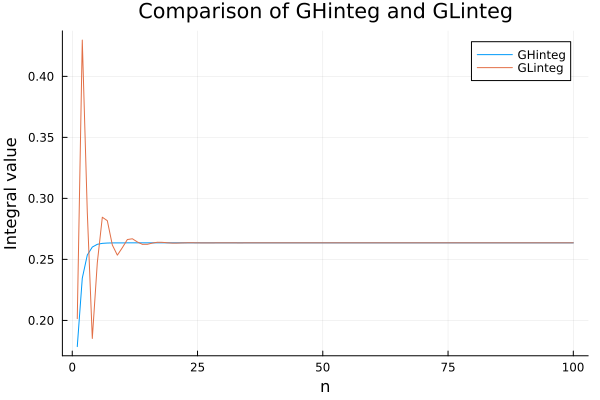

In [6]:
# 分佈一律取 N(0,1)的情況

using FastGaussQuadrature, Distributions, Plots

function GHinteg(; a, b, n=30)
    f(x)= exp(x^2) * pdf(Normal(0,1),x) * cdf(Normal(0,1), (x-a)/b)
    xi, wi = gausshermite(n)
    answer = sum(wi .* f.(xi))
    return answer
end


function GLinteg(; a, b, n=30)
    f(t)= cdf(Normal(0,1), (t/(b*(1-t^2))-a/b)) * pdf(Normal(0,1), t/(1-t^2)) * (t^2+1)/((t^2-1)^2)
    xi, wi = gausslegendre(n)
    answer=sum(wi .* f.(xi))
    return answer
end


# verify our result

using QuadGK
a=2
b=2
f(x)= pdf(Normal(0,1),x) * cdf(Normal(0,1), (x-a)/b)
@show quadgk(f,-Inf,Inf)
@show GHinteg(a=2,b=2)
@show GLinteg(a=2,b=2)


# Compute the integrals for a range of n values



a = 2
b = 3
n_values = 1:100
# put the result into vectors
GHinteg_values = [GHinteg(a=a, b=b, n=n) for n in n_values]
GLinteg_values = [GLinteg(a=a, b=b, n=n) for n in n_values]

        
# Plot the results
    
plot(n_values, GHinteg_values, label="GHinteg")
plot!(n_values, GLinteg_values, label="GLinteg")
xlabel!("n")
ylabel!("Integral value")
title!("Comparison of GHinteg and GLinteg")
    


To determine which function converges more quickly, we can look at the plot and see which function reaches the desired precision of 6 digits after the decimal more quickly.

In this case, it appears that the GHinteg function converges more quickly than the GLinteg function, as the GHInteg curve approaches the true value of the integral more quickly.

The GL rule is more general to apply.  

But if the integration problem is of a particular type, directly applying the type's rule is often more efficient 

As in our case above, the GH rule is more efficient as the integration problem involves density functions of normal random variables. 

## This problem asks you to consider an integration problem where it can be transformed to different types to use different Gaussian quadrature rules. Which one is the best? The integration problem is:

 $$\begin{aligned}
 \int_{a}^\infty \exp\left(-\frac{1}{100}x^2\right)(1+x^2) dx,
 \end{aligned}$$

where $a$ is finite but not necessarily 0. This problem has some characteristics of the GLa and GH types: It has an exponential function, and by mapping $a$ to $-1$, $0$ or $-\infty$ via change of variables, the domain would be of the GL, GLa and GH types, respectively. You are asked to perform the approximation using rules of each of the types and compare the performance. In the code, make $a$ a parameter that we can assign a value to it.

 - ##### Write Julia code that uses the GL rule to approximate the integral. 
 - ##### Write Julia code that uses the GLa rule to approximate the integral. 
 - ##### Write Julia code that uses the GH rule to approximate the integral. 
 - ##### Suppose the required precision is 6 digits after the decimal. Compare the performances of these functions; drawing a graph will be useful. You may pick a value for $a$ in the comparison. 
 - ##### According to your result above, which rule converges more quickly (smaller $n$)? What is the intuition behind the result?

For GL rule, the transformation is $x=a+\frac{1+t}{1-t}$, with Jacobian=$\frac{2}{(t-1)^2}$

For GLa rule, the transformation is $t=x-a, x=t+a$, with Jacobian=$1$

For GH rule, the transformation is $t=log(x-a), x=e^t+a$, with Jacobian=$e^t$

GLinteg(a = 2, n = 100) = 447.39851022689925
GLainteg(a = 2, n = 100) = 447.3985101236859
GHinteg(a = 2, n = 100) = 447.39850007071925
quadgk(f, 2, Inf) = (447.3985101236897, 5.269714951368377e-6)


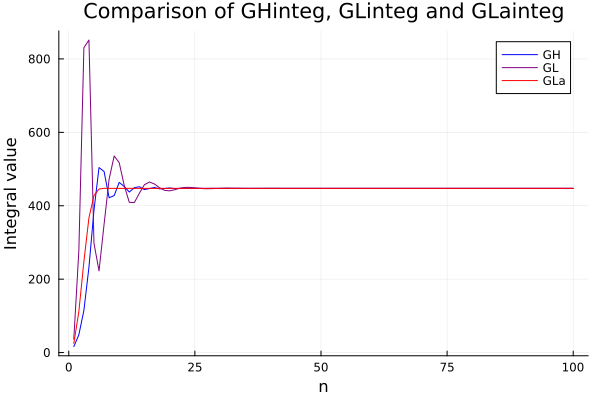

In [12]:
using QuadGK, FastGaussQuadrature, StatsPlots

# GL rule

function GLinteg(; a=0, n=30)
    f(t)=exp((-1/100) * (a+((1+t)/(1-t)))^2) * (1+(a+((1+t)/(1-t)))^2) * (2/(t-1)^2)
    xi, wi = gausslegendre(n)
    answer=sum(wi .* f.(xi))
    return answer
end


# GLa rule

function GLainteg(; a=0, n=30)
    # wrong code: f(t)=exp(t+a) * exp((-(t+a)^2)/100)*(1+((t+a)^2))
    f(t)=exp(t) * exp((-(t+a)^2)/100)*(1+((t+a)^2))
    xi, wi = gausslaguerre(n)
    answer=sum(wi .* f.(xi))
    return answer
end


# GH rule
function GHinteg(; a=0, n=30)
    # wrong code: f(t)=  exp((exp(t)+a)^2) *exp((-1/100)* (exp(t)+a)^2) * (1+(exp(t)+a)^2) * exp(t)
    f(t)=  exp(t^2) *exp((-1/100)* (exp(t)+a)^2) * (1+(exp(t)+a)^2) * exp(t)
    xi, wi = gausshermite(n)
    answer=sum(wi .* f.(xi))
    return answer
end

@show GLinteg(a=2, n=100)
@show GLainteg(a=2, n=100)
@show GHinteg(a=2, n=100)

using QuadGK

f(x)=exp((-1/100)*x^2)*(1+x^2)
@show quadgk(f,2,Inf)


a=2
n_values = 1:100
# put the result into vectors
GHinteg_values = [GHinteg(a=a, n=n) for n in n_values]
GLinteg_values = [GLinteg(a=a, n=n) for n in n_values]
GLainteg_values = [GLainteg(a=a, n=n) for n in n_values]
        
# Plot the results
    
plot(n_values, GHinteg_values, label="GH", color=:blue)
plot!(GLinteg_values, label="GL", color=:Purple)
plot!(GLainteg_values, label="GLa", color=:Red)
xlabel!("n")
ylabel!("Integral value")
title!("Comparison of GHinteg, GLinteg and GLainteg")

From the graph above, we can see the GLa rule converge more quickly than GH and GL rules.

A possible reason is that the form of the integral and the domain of x are similar to that of the GLa rule requires.